In [1]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install plotly
# %pip install scipy
# %pip install -U nbformat


In [2]:
#%pip install pandas plotly scipy numpy
#%pip install pycountry_convert
#%pip install bar_chart_race
#conda install -c conda-forge ffmpeg

In [3]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
import plotly.express as px
import itertools

# https://www.kaggle.com/datasets/jfreyberg/spotify-chart-data

# --- PASO 0: Cargar DataFrame y Preparación Inicial ---
csv_filename = "charts.csv"
df_final = pd.read_csv(csv_filename, encoding='utf-8')
print(f"DataFrame '{csv_filename}' cargado (Dimensiones: {df_final.shape})")
 #df_final.dropna(subset=['Religion Grupo'], inplace=True)

print(df_final.shape)


DataFrame 'charts.csv' cargado (Dimensiones: (5428021, 10))
(5428021, 10)


In [4]:
display(df_final)

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
0,2021/04/15,de,82,625718,20IvMlpi4U5RuDnAlXSRiV,['Haftbefehl'],['german hip hop'],198746,False,Crackküche
1,2019/01/31,jp,171,50896,0V1K6MU0utODk4yNqZKsFv,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False,WATER
2,2018/11/15,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,2018/11/22,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,2018/11/29,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
...,...,...,...,...,...,...,...,...,...,...
5428016,2019/11/28,se,163,165644,7731grGgxDd7aBNpGOjm9k,['Ebbot Lundberg'],['swedish alternative rock'],252798,False,När löven faller
5428017,2019/01/17,jp,161,49580,4Vm9XIi9AD1oK39xACmqk5,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False,ワガママで誤魔化さないで
5428018,2019/01/24,jp,139,56826,4Vm9XIi9AD1oK39xACmqk5,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False,ワガママで誤魔化さないで
5428019,2019/01/31,jp,151,53897,4Vm9XIi9AD1oK39xACmqk5,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False,ワガママで誤魔化さないで


Los gráficos se guardarán en la carpeta: 'eda_plots/'
DataFrame 'charts.csv' cargado (Dimensiones: (5428021, 10))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428021 entries, 0 to 5428020
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   country        object
 2   position       int64 
 3   streams        int64 
 4   track_id       object
 5   artists        object
 6   artist_genres  object
 7   duration       int64 
 8   explicit       bool  
 9   name           object
dtypes: bool(1), int64(3), object(6)
memory usage: 377.9+ MB
         date country  position  streams                track_id  \
0  2021/04/15      de        82   625718  20IvMlpi4U5RuDnAlXSRiV   
1  2019/01/31      jp       171    50896  0V1K6MU0utODk4yNqZKsFv   
2  2018/11/15      tr        59   185439  4qzZm5EIdFurBpDieEmVc9   
3  2018/11/22      tr       133   111159  4qzZm5EIdFurBpDieEmVc9   
4  2018/11/29      tr       166    96204  4qzZm5

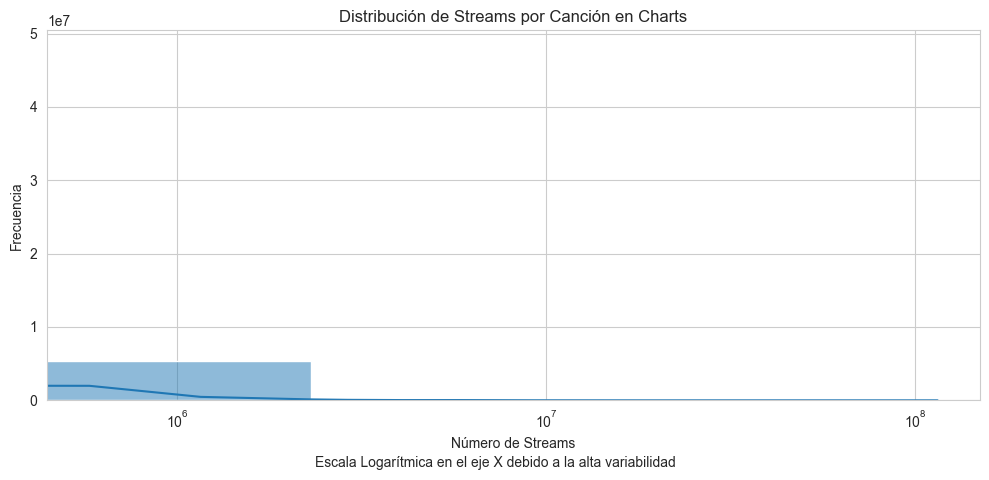

Guardado: distribucion_streams.png


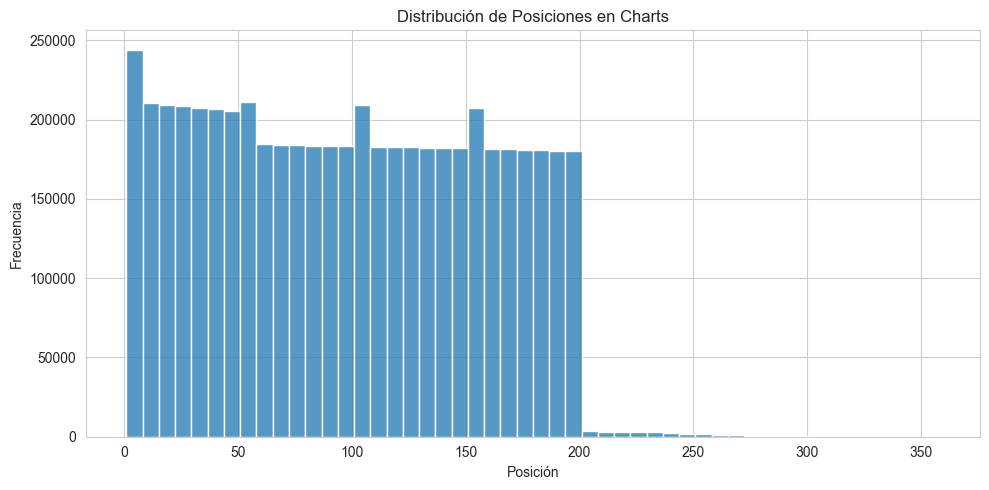

Guardado: distribucion_posiciones.png


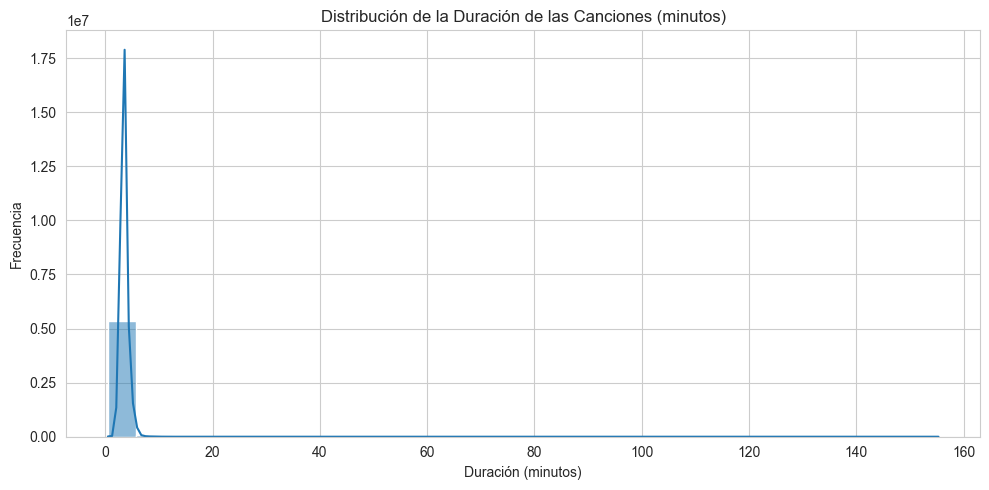

Guardado: distribucion_duracion.png


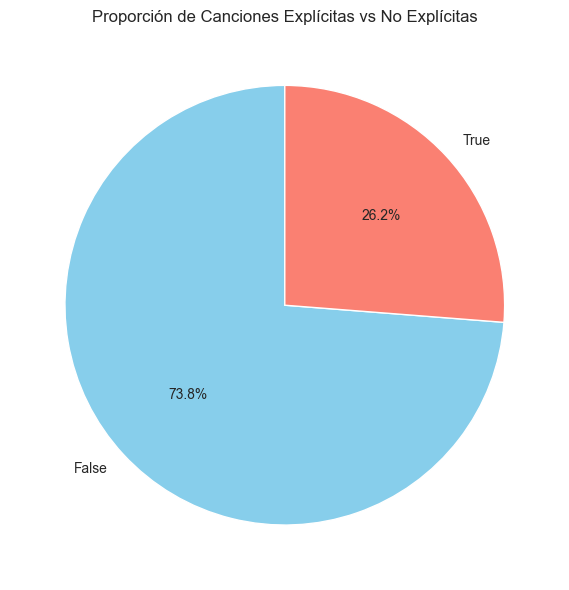

Guardado: proporcion_explicit.png


C:\Users\seoma\AppData\Local\Temp\ipykernel_20160\2165561640.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


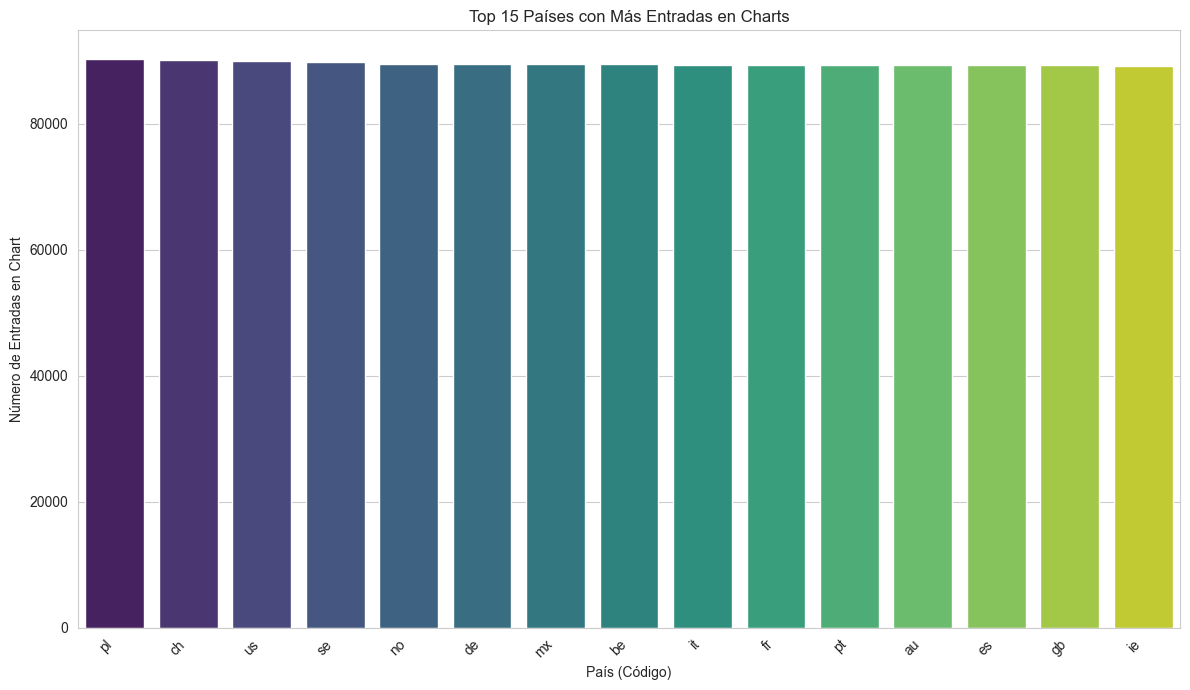

Guardado: top_paises_entradas.png


C:\Users\seoma\AppData\Local\Temp\ipykernel_20160\2165561640.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='appearances', y='artist', data=df_top_artists, palette="magma", orient='h')


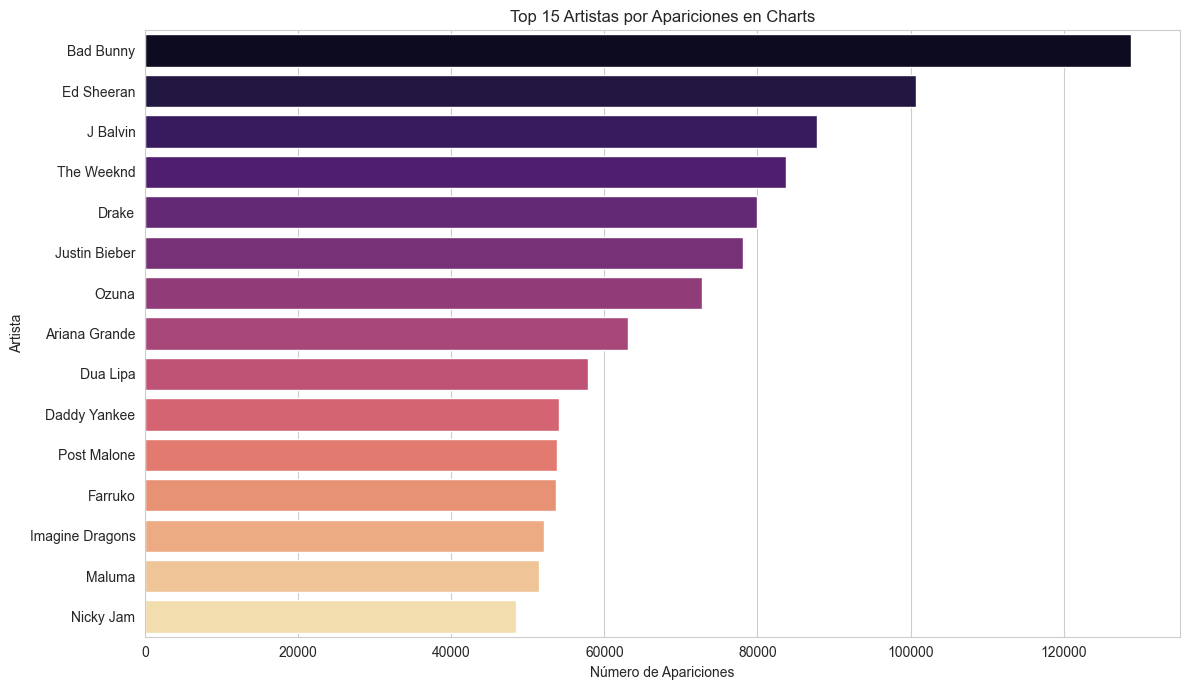

Guardado: top_artistas_apariciones.png


C:\Users\seoma\AppData\Local\Temp\ipykernel_20160\2165561640.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='appearances', y='genre', data=df_top_genres, palette="coolwarm", orient='h')


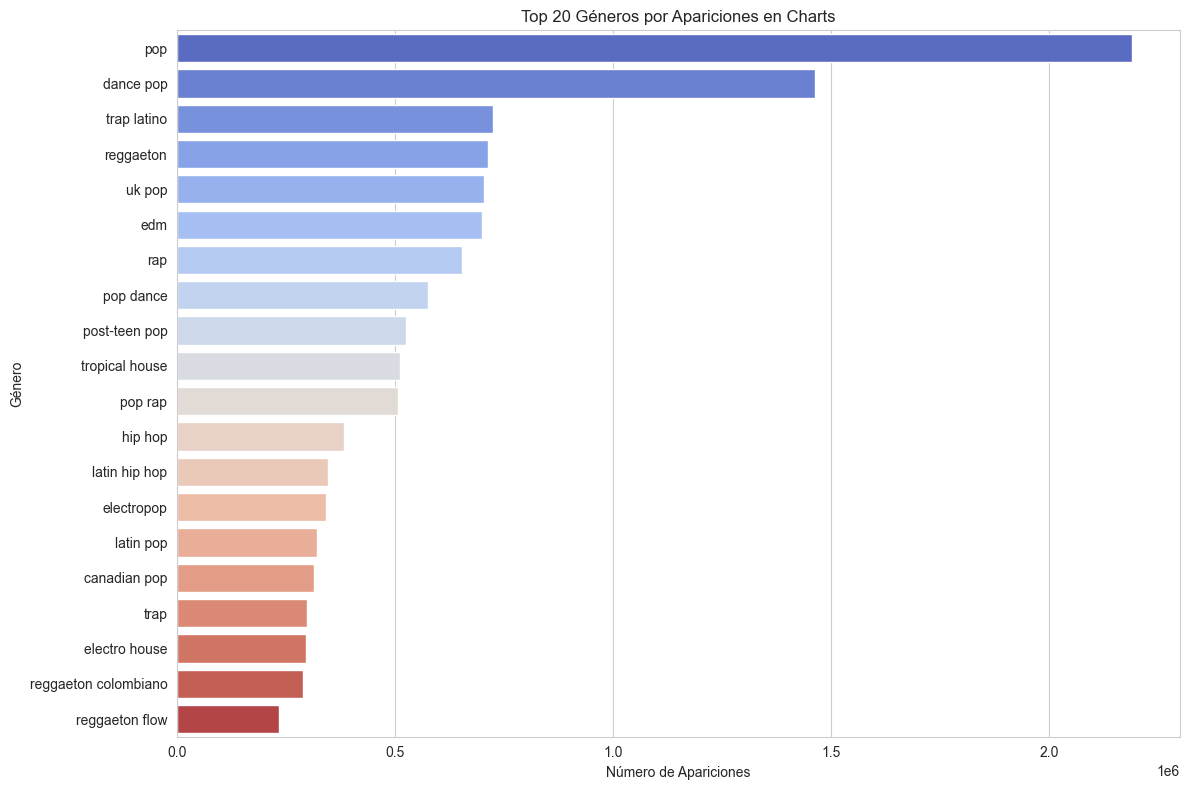

Guardado: top_generos_apariciones.png


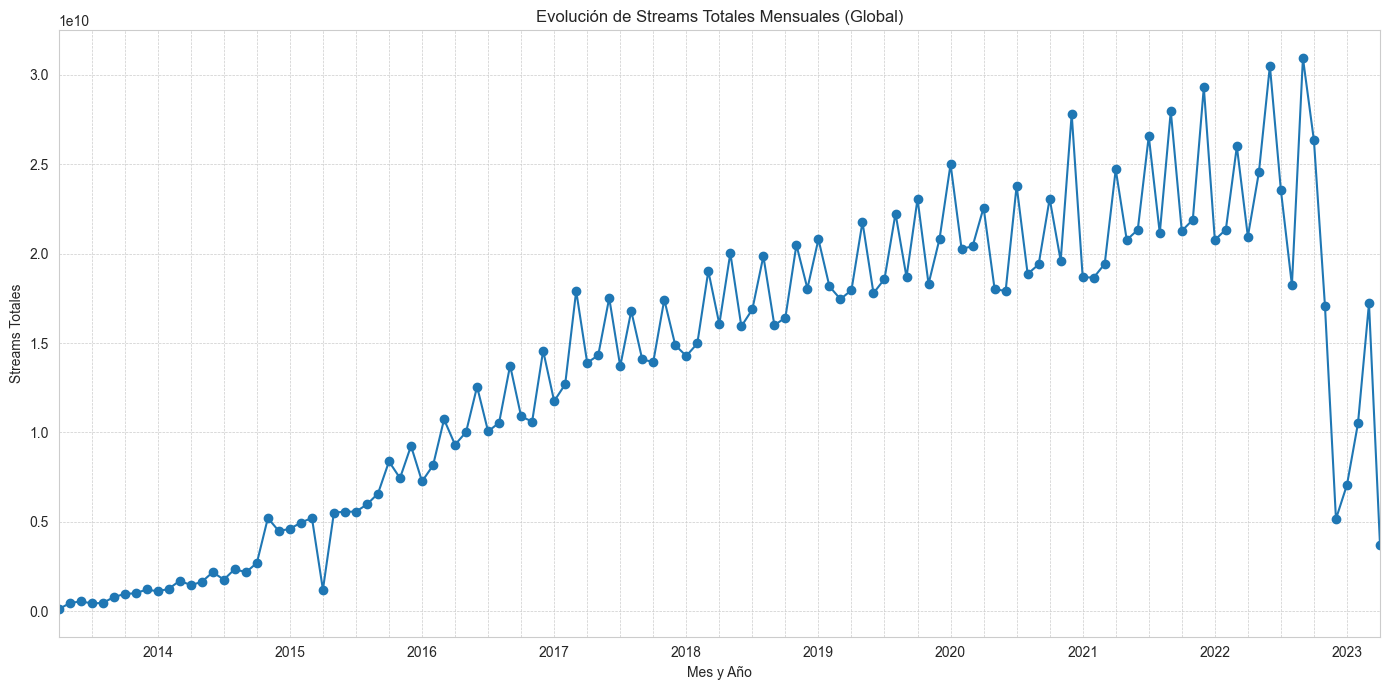

Guardado: evolucion_streams_mensuales.png


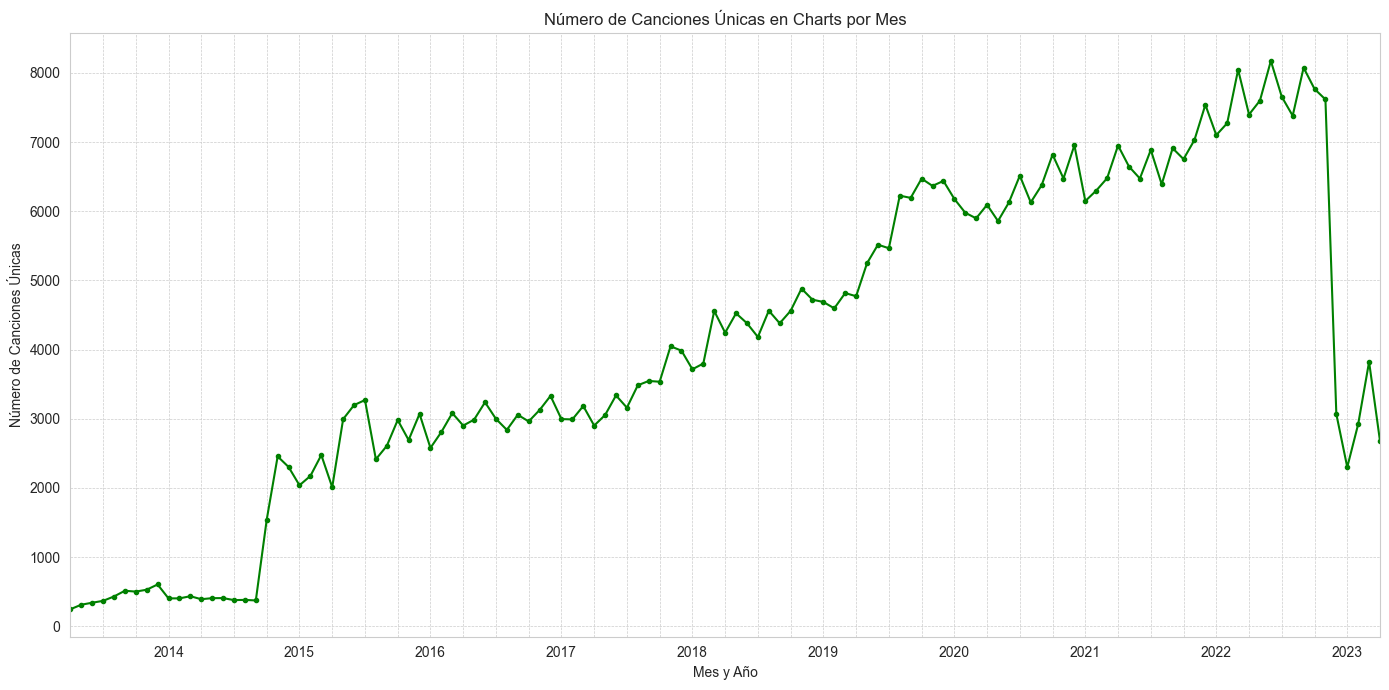

Guardado: canciones_unicas_mensuales.png


C:\Users\seoma\AppData\Local\Temp\ipykernel_20160\2165561640.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_streams_per_song.values, y=total_streams_per_song.index, palette="rocket", orient='h')


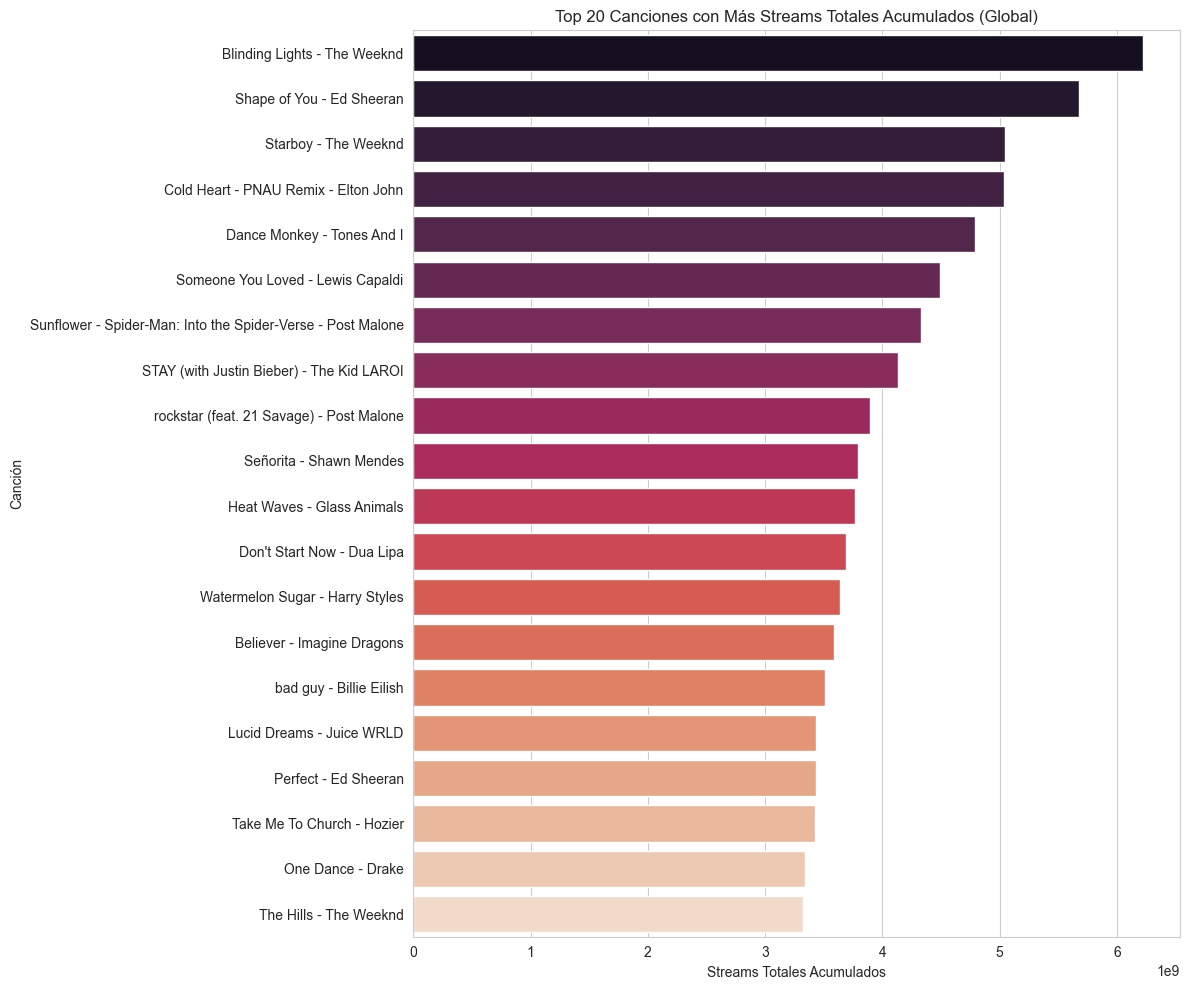

Guardado: top_canciones_streams_acumulados.png

--- Fin del Análisis Exploratorio de Datos con Guardado de Gráficos ---


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import os

# --- 0. Configuración, Creación de Carpeta y Carga de Datos ---
# Crear carpeta para guardar los plots si no existe
output_plot_dir = "eda_plots"
if not os.path.exists(output_plot_dir):
    os.makedirs(output_plot_dir)
print(f"Los gráficos se guardarán en la carpeta: '{output_plot_dir}/'")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

csv_filename = "charts.csv"
try:
    df = pd.read_csv(csv_filename, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_filename, encoding='latin1')
print(f"DataFrame '{csv_filename}' cargado (Dimensiones: {df.shape})")

# --- 1. Inspección Inicial y Limpieza Básica ---
df.info()
print(df.head())
print(df.describe(include='all'))
print(df.isnull().sum())

df.dropna(subset=['name', 'artists', 'streams'], inplace=True)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d', errors='coerce')
df.dropna(subset=['date'], inplace=True)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')

def safe_literal_eval(val):
    try:
        if isinstance(val, list): return val
        if isinstance(val, str): return ast.literal_eval(val)
        return []
    except (ValueError, SyntaxError): return []

print("\nParseando 'artists' y 'artist_genres'...")
df['artists_list'] = df['artists'].apply(safe_literal_eval)
df['genres_list'] = df['artist_genres'].apply(safe_literal_eval)

# --- 2. Análisis Univariado ---

# 2.1 Distribución de 'streams'
plt.figure(figsize=(10, 5))
sns.histplot(df['streams'], bins=50, kde=True)
plt.title('Distribución de Streams por Canción en Charts')
plt.xlabel('Número de Streams')
plt.ylabel('Frecuencia')
plt.xscale('log')
plt.suptitle('Escala Logarítmica en el eje X debido a la alta variabilidad', y=0.02, fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'distribucion_streams.png'), bbox_inches='tight')
plt.show()
print("Guardado: distribucion_streams.png")

# 2.2 Distribución de 'position'
plt.figure(figsize=(10, 5))
sns.histplot(df['position'], bins=50, kde=False)
plt.title('Distribución de Posiciones en Charts')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'distribucion_posiciones.png'), bbox_inches='tight')
plt.show()
print("Guardado: distribucion_posiciones.png")

# 2.3 Distribución de 'duration' (en minutos)
df['duration_min'] = df['duration'] / 60000
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_min'], bins=30, kde=True)
plt.title('Distribución de la Duración de las Canciones (minutos)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'distribucion_duracion.png'), bbox_inches='tight')
plt.show()
print("Guardado: distribucion_duracion.png")

# 2.4 Conteo de canciones 'explicit'
plt.figure(figsize=(6, 6))
df['explicit'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Canciones Explícitas vs No Explícitas')
plt.ylabel('')
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'proporcion_explicit.png'), bbox_inches='tight')
plt.show()
print("Guardado: proporcion_explicit.png")

# 2.5 Top N Países por número de entradas en los charts
top_n_countries = 15
plt.figure(figsize=(12, 7))
country_counts = df['country'].value_counts().nlargest(top_n_countries)
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.title(f'Top {top_n_countries} Países con Más Entradas en Charts')
plt.xlabel('País (Código)')
plt.ylabel('Número de Entradas en Chart')
plt.xticks(rotation=45, ha="right") # ha="right" para mejor alineación de etiquetas rotadas
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'top_paises_entradas.png'), bbox_inches='tight')
plt.show()
print("Guardado: top_paises_entradas.png")

# --- 3. Análisis de Artistas y Géneros ---

# 3.1 Top N Artistas (por número de apariciones en charts)
all_artists = []
for artists_in_song in df['artists_list']: all_artists.extend(artists_in_song)
artist_counts = Counter(all_artists)
top_n_artists = 15
most_common_artists = artist_counts.most_common(top_n_artists)
df_top_artists = pd.DataFrame(most_common_artists, columns=['artist', 'appearances'])

plt.figure(figsize=(12, 7))
sns.barplot(x='appearances', y='artist', data=df_top_artists, palette="magma", orient='h')
plt.title(f'Top {top_n_artists} Artistas por Apariciones en Charts')
plt.xlabel('Número de Apariciones')
plt.ylabel('Artista')
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'top_artistas_apariciones.png'), bbox_inches='tight')
plt.show()
print("Guardado: top_artistas_apariciones.png")

# 3.2 Top N Géneros (por número de apariciones)
all_genres = []
for genres_in_song in df['genres_list']: all_genres.extend(genres_in_song)
genre_counts = Counter(all_genres)
top_n_genres = 20
most_common_genres = genre_counts.most_common(top_n_genres)
df_top_genres = pd.DataFrame(most_common_genres, columns=['genre', 'appearances'])

plt.figure(figsize=(12, 8))
sns.barplot(x='appearances', y='genre', data=df_top_genres, palette="coolwarm", orient='h')
plt.title(f'Top {top_n_genres} Géneros por Apariciones en Charts')
plt.xlabel('Número de Apariciones')
plt.ylabel('Género')
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'top_generos_apariciones.png'), bbox_inches='tight')
plt.show()
print("Guardado: top_generos_apariciones.png")

# --- 4. Análisis Temporal ---

# 4.1 Streams totales por mes a lo largo del tiempo
monthly_total_streams = df.groupby('year_month')['streams'].sum()
plt.figure(figsize=(14, 7))
if not isinstance(monthly_total_streams.index, pd.DatetimeIndex):
    monthly_total_streams.index = monthly_total_streams.index.to_timestamp()
monthly_total_streams.plot(kind='line', marker='o', linestyle='-')
plt.title('Evolución de Streams Totales Mensuales (Global)')
plt.xlabel('Mes y Año')
plt.ylabel('Streams Totales')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'evolucion_streams_mensuales.png'), bbox_inches='tight')
plt.show()
print("Guardado: evolucion_streams_mensuales.png")

# 4.2 Número de canciones únicas en charts por mes
monthly_unique_songs = df.groupby('year_month')['track_id'].nunique()
plt.figure(figsize=(14, 7))
if not isinstance(monthly_unique_songs.index, pd.DatetimeIndex):
    monthly_unique_songs.index = monthly_unique_songs.index.to_timestamp()
monthly_unique_songs.plot(kind='line', color='green', marker='.')
plt.title('Número de Canciones Únicas en Charts por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Canciones Únicas')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'canciones_unicas_mensuales.png'), bbox_inches='tight')
plt.show()
print("Guardado: canciones_unicas_mensuales.png")

# --- 5. EDA Específico para Bar Chart Race ---

# 5.1 Canciones con más streams totales acumulados (Top N)
if 'song_display_name' not in df.columns:
    df['song_display_name'] = df['name'] + ' - ' + df['artists_list'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown Artist')

total_streams_per_song = df.groupby('song_display_name')['streams'].sum().nlargest(20)
plt.figure(figsize=(12, 10))
sns.barplot(x=total_streams_per_song.values, y=total_streams_per_song.index, palette="rocket", orient='h')
plt.title('Top 20 Canciones con Más Streams Totales Acumulados (Global)')
plt.xlabel('Streams Totales Acumulados')
plt.ylabel('Canción')
plt.tight_layout()
plt.savefig(os.path.join(output_plot_dir, 'top_canciones_streams_acumulados.png'), bbox_inches='tight')
plt.show()
print("Guardado: top_canciones_streams_acumulados.png")

print("\n--- Fin del Análisis Exploratorio de Datos con Guardado de Gráficos ---")

In [6]:
import pandas as pd
import numpy as np
import ast
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# --- 0. Carga de Datos ---
# Si necesitas recargar:
csv_filename = "charts.csv"
try:
    df = pd.read_csv(csv_filename, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_filename, encoding='latin1')
print(f"DataFrame '{csv_filename}' cargado (Dimensiones originales: {df.shape})")

# --- 1. Eliminar Filas con 'name' Nulo ---
print(f"\nNúmero de filas antes de eliminar nulos en 'name': {len(df)}")
df.dropna(subset=['name'], inplace=True)
print(f"Número de filas después de eliminar nulos en 'name': {len(df)}")
print(f"Se eliminaron {5428021 - len(df)} filas con 'name' nulo.")

# --- 2. Mapear País a Continente ---

# Diccionario para mapear códigos de continente a nombres completos
continent_mapping = {
    'AF': 'Africa',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'OC': 'Oceania',
    'SA': 'South America'
}

# Función para obtener el continente
def get_continent(country_code):
    try:
        continent_code = country_alpha2_to_continent_code(country_code.upper())
        return continent_mapping.get(continent_code, 'Unknown')
    except Exception:
        # Casos especiales o códigos no estándar
        if country_code.lower() == 'global': # Si tienes una región 'global'
            return 'Global'
        return 'Unknown'

print("\nAñadiendo columna 'continent'...")
df['continent'] = df['country'].apply(get_continent)

# Verificar los continentes encontrados y los 'Unknown'
print("\nConteo de entradas por continente:")
print(df['continent'].value_counts())

unknown_continent_countries = df[df['continent'] == 'Unknown']['country'].unique()
if len(unknown_continent_countries) > 0:
    print(f"\nPaíses con continente 'Unknown' (necesitan revisión o mapeo manual): {unknown_continent_countries}")
else:
    print("\nTodos los países fueron mapeados a un continente conocido o 'Global'.")


# --- Preparación de otras columnas ---
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d', errors='coerce')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')

def safe_literal_eval(val):
    try:
        if isinstance(val, list): return val
        if isinstance(val, str): return ast.literal_eval(val)
        return []
    except (ValueError, SyntaxError):
        return []

df['artists_list'] = df['artists'].apply(safe_literal_eval)
df['genres_list'] = df['artist_genres'].apply(safe_literal_eval)
df['duration_min'] = df['duration'] / 60000
df['song_display_name'] = df['name'] + ' - ' + df['artists_list'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown Artist')


# Guardamos este DataFrame como nuestro nuevo punto de partida
df_final = df.copy()
print(f"\nDimensiones del DataFrame final con continentes: {df_final.shape}")
print("\nPrimeras filas del DataFrame final:")
print(df_final.head())
print("\nColumnas del DataFrame final:")
print(df_final.columns.tolist())


DataFrame 'charts.csv' cargado (Dimensiones originales: (5428021, 10))

Número de filas antes de eliminar nulos en 'name': 5428021
Número de filas después de eliminar nulos en 'name': 5427136
Se eliminaron 885 filas con 'name' nulo.

Añadiendo columna 'continent'...

Conteo de entradas por continente:
continent
Europe           2416040
Asia             1008665
North America     845769
South America     771139
Oceania           178527
Africa            118540
Global             88456
Name: count, dtype: int64

Todos los países fueron mapeados a un continente conocido o 'Global'.

Dimensiones del DataFrame final con continentes: (5427136, 18)

Primeras filas del DataFrame final:
        date country  position  streams                track_id  \
0 2021-04-15      de        82   625718  20IvMlpi4U5RuDnAlXSRiV   
1 2019-01-31      jp       171    50896  0V1K6MU0utODk4yNqZKsFv   
2 2018-11-15      tr        59   185439  4qzZm5EIdFurBpDieEmVc9   
3 2018-11-22      tr       133   111159  4qzZm

In [7]:
output_preprocessed_filename = "df_final_preprocesado.csv"
df_final.to_csv(output_preprocessed_filename, index=False, encoding='utf-8')
print(f"\nDataFrame preprocesado guardado como '{output_preprocessed_filename}'")
print("--- Fin Bloque 1 ---")


DataFrame preprocesado guardado como 'df_final_preprocesado.csv'
--- Fin Bloque 1 ---


In [8]:
########CASI PERFECTO!
import pandas as pd
import numpy as np

# --- Carga del DataFrame Preprocesado (df_final_preprocesado.csv) ---
preprocessed_csv_filename = "df_final_preprocesado.csv"
print(f"--- Bloque de Preparación de CSV para Herramientas Online (Streams en Millones, Fecha Formateada) ---")
print(f"Cargando '{preprocessed_csv_filename}'...")
df_input = pd.read_csv(preprocessed_csv_filename, encoding='utf-8', parse_dates=['date'])
print(f"'{preprocessed_csv_filename}' cargado. Dimensiones: {df_input.shape}.")

# --- Recrear el DataFrame Pivotado Acumulativo ---
print("Creando 'year_month'...")
df_input['year_month'] = df_input['date'].dt.to_period('M')

print("Agregando streams globalmente por mes y canción...")
monthly_global_streams = df_input.groupby(['year_month', 'song_display_name'])['streams'].sum().reset_index()

print("Pivotando la tabla (streams mensuales)...")
pivot_df_monthly = monthly_global_streams.pivot_table(
    values='streams', index='year_month', columns='song_display_name', fill_value=0
)
pivot_df_monthly = pivot_df_monthly.sort_index()

print("Calculando streams acumulativos...")
pivot_df_cumulative_original_streams = pivot_df_monthly.cumsum(axis=0) # Mantenemos el original por si acaso

# --- Convertir Streams a Millones ANTES de optimizar y transponer ---
print("\nConvirtiendo streams acumulativos a millones...")
pivot_df_cumulative_millions = pivot_df_cumulative_original_streams / 1000000.0
print("Streams convertidos a millones.")


# --- Optimización de Columnas ---
N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION = 1000
if pivot_df_cumulative_millions.shape[1] > N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION:
    print(f"Optimizando: Seleccionando las top {N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION} canciones (basado en streams en millones).")
    overall_song_totals_final_millions = pivot_df_cumulative_millions.iloc[-1]
    top_song_columns = overall_song_totals_final_millions.nlargest(N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION).index
    data_to_transpose = pivot_df_cumulative_millions[top_song_columns].copy()
else:
    data_to_transpose = pivot_df_cumulative_millions.copy()

if data_to_transpose.columns.duplicated().any():
    print(f"ADVERTENCIA: Se encontraron nombres de columna duplicados. Eliminando...")
    data_to_transpose = data_to_transpose.loc[:, ~data_to_transpose.columns.duplicated()]
print(f"DataFrame optimizado antes de transponer. Forma: {data_to_transpose.shape}")

# --- TRANSFORMAR AL FORMATO REQUERIDO ---
print("\nTransponiendo DataFrame...")
df_transposed = data_to_transpose.transpose()
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'song_display_name': 'Label'}, inplace=True)

# Formateo de columnas de fecha como "Mes - Año"
meses_es = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
new_columns = ['Label']
for col in df_transposed.columns[1:]:
    year = col.year
    month_num = col.month
    month_name = meses_es.get(month_num, str(month_num).zfill(2))
    new_columns.append(f"{month_name} - {year}")
df_transposed.columns = new_columns

# Columna 'Image URL' (Placeholder)
if 'Image URL' not in df_transposed.columns:
    df_transposed.insert(1, 'Image URL', "")

print(f"\nDataFrame final para Herramientas Online. Forma: {df_transposed.shape}")

output_csv_for_online_tool = "spotify_data_for_livingcharts_millions_date.csv"
df_transposed.to_csv(output_csv_for_online_tool, index=False, encoding='utf-8')

print(f"\nCSV con streams en millones y fechas formateadas guardado como '{output_csv_for_online_tool}'")
print("Columnas: 'Label', 'Image URL', [Mes - Año]...")
print("Valores: Streams acumulativos EN MILLONES.")
print("\nPrimeras filas del CSV a guardar (valores en millones):")
print(df_transposed.head().iloc[:, :5])
print("--- Fin Bloque de Preparación de CSV (Streams en Millones, Fecha Mejorada) ---")

--- Bloque de Preparación de CSV para Herramientas Online (Streams en Millones, Fecha Formateada) ---
Cargando 'df_final_preprocesado.csv'...
'df_final_preprocesado.csv' cargado. Dimensiones: (5427136, 18).
Creando 'year_month'...
Agregando streams globalmente por mes y canción...
Pivotando la tabla (streams mensuales)...
Calculando streams acumulativos...

Convirtiendo streams acumulativos a millones...
Streams convertidos a millones.
Optimizando: Seleccionando las top 1000 canciones (basado en streams en millones).
DataFrame optimizado antes de transponer. Forma: (121, 1000)

Transponiendo DataFrame...

DataFrame final para Herramientas Online. Forma: (1000, 123)

CSV con streams en millones y fechas formateadas guardado como 'spotify_data_for_livingcharts_millions_date.csv'
Columnas: 'Label', 'Image URL', [Mes - Año]...
Valores: Streams acumulativos EN MILLONES.

Primeras filas del CSV a guardar (valores en millones):
                                  Label Image URL  Abr - 2013  Ma

In [9]:
# PARA LIVING CHARTS No me ha gustado como es el bar chart race de python
import pandas as pd
import numpy as np

# --- Carga del DataFrame Preprocesado ---
preprocessed_csv_filename = "df_final_preprocesado.csv"
print(f"--- Bloque de Preparación de CSV para Herramientas Online (Streams en Millones, Fecha Formateada, Inicio con 1 Stream) ---")
print(f"Cargando '{preprocessed_csv_filename}'...")
df_input = pd.read_csv(preprocessed_csv_filename, encoding='utf-8', parse_dates=['date'])
print(f"'{preprocessed_csv_filename}' cargado. Dimensiones: {df_input.shape}.")

# --- Recrear el DataFrame Pivotado ---
print("\nCreando 'year_month'...")
df_input['year_month'] = df_input['date'].dt.to_period('M')

print("Agregando streams globalmente por mes y canción...")
monthly_global_streams = df_input.groupby(['year_month', 'song_display_name'])['streams'].sum().reset_index()

print("Pivotando la tabla (streams mensuales)...")
pivot_df_monthly = monthly_global_streams.pivot_table(
    values='streams', index='year_month', columns='song_display_name', fill_value=0
)
pivot_df_monthly = pivot_df_monthly.sort_index()
print("Forma de pivot_df_monthly:", pivot_df_monthly.shape)


# --- Establecer ceros en la primera fila a 1 (para streams mensuales) ---
print("\nModificando ceros en el primer período de tiempo a 1 stream...")
if not pivot_df_monthly.empty:
    primera_fila_original = pivot_df_monthly.iloc[0].copy()
    columnas_con_cero_inicial = primera_fila_original[primera_fila_original == 0].index
    pivot_df_monthly.iloc[0, pivot_df_monthly.columns.get_indexer(columnas_con_cero_inicial)] = 1
    print(f"Se modificaron {len(columnas_con_cero_inicial)} canciones que tenían 0 streams en el primer período a 1 stream.")
else:
    print("pivot_df_monthly está vacío, no se aplicaron modificaciones de ceros iniciales.")

print("\nCalculando streams acumulativos...")
pivot_df_cumulative_original_streams = pivot_df_monthly.cumsum(axis=0)

print("\nConvirtiendo streams acumulativos a millones...")
pivot_df_cumulative_millions = pivot_df_cumulative_original_streams / 1000000.0
print("Streams convertidos a millones.")

# --- Optimización de Columnas ---
N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION = 1000
if pivot_df_cumulative_millions.shape[1] > N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION:
    print(f"Optimizando: Seleccionando las top {N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION} canciones (basado en streams en millones).")
    overall_song_totals_final_millions = pivot_df_cumulative_millions.iloc[-1]
    top_song_columns = overall_song_totals_final_millions.nlargest(N_TOP_SONGS_OVERALL_FOR_OPTIMIZATION).index
    data_to_transpose = pivot_df_cumulative_millions[top_song_columns].copy()
else:
    data_to_transpose = pivot_df_cumulative_millions.copy()

if data_to_transpose.columns.duplicated().any():
    print(f"ADVERTENCIA: Se encontraron nombres de columna duplicados. Eliminando...")
    data_to_transpose = data_to_transpose.loc[:, ~data_to_transpose.columns.duplicated()]
print(f"DataFrame optimizado antes de transponer. Forma: {data_to_transpose.shape}")

# --- TRANSFORMAR AL FORMATO REQUERIDO ---
print("\nTransponiendo DataFrame...")
df_transposed = data_to_transpose.transpose()
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'song_display_name': 'Label'}, inplace=True)

# Formateo de columnas de fecha como "Mes - Año"
meses_es = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
new_columns = ['Label']

for original_period_index_val in data_to_transpose.index:
    year = original_period_index_val.year
    month_num = original_period_index_val.month
    month_name = meses_es.get(month_num, str(month_num).zfill(2))
    new_columns.append(f"{month_name} - {year}")
df_transposed.columns = new_columns


# Columna 'Image URL' (Placeholder)
if 'Image URL' not in df_transposed.columns:
    df_transposed.insert(1, 'Image URL', "")

print(f"\nDataFrame final para Herramientas Online. Forma: {df_transposed.shape}")

# Nombre de archivo de salida actualizado para esta versión
output_csv_for_online_tool = "spotify_data_for_livingcharts_millions_date_1stream_start.csv"
df_transposed.to_csv(output_csv_for_online_tool, index=False, encoding='utf-8')

print(f"\nCSV con streams en millones (inicio 1 stream) y fechas formateadas guardado como '{output_csv_for_online_tool}'")
print("Columnas: 'Label', 'Image URL', [Mes - Año]...")
print("Valores: Streams acumulativos EN MILLONES (con canciones iniciando con al menos 1 stream en el primer período).")
print("\nPrimeras filas del CSV a guardar (valores en millones):")
print(df_transposed.head().iloc[:, :5])
print("--- Fin Bloque de Preparación de CSV (Streams en Millones, Fecha Mejorada, Inicio 1 Stream) ---")

--- Bloque de Preparación de CSV para Herramientas Online (Streams en Millones, Fecha Formateada, Inicio con 1 Stream) ---
Cargando 'df_final_preprocesado.csv'...
'df_final_preprocesado.csv' cargado. Dimensiones: (5427136, 18).

Creando 'year_month'...
Agregando streams globalmente por mes y canción...
Pivotando la tabla (streams mensuales)...
Forma de pivot_df_monthly: (121, 108762)

Modificando ceros en el primer período de tiempo a 1 stream...
Se modificaron 108519 canciones que tenían 0 streams en el primer período a 1 stream.

Calculando streams acumulativos...

Convirtiendo streams acumulativos a millones...
Streams convertidos a millones.
Optimizando: Seleccionando las top 1000 canciones (basado en streams en millones).
DataFrame optimizado antes de transponer. Forma: (121, 1000)

Transponiendo DataFrame...

DataFrame final para Herramientas Online. Forma: (1000, 123)

CSV con streams en millones (inicio 1 stream) y fechas formateadas guardado como 'spotify_data_for_livingcharts